In [1]:
import glob,os,sys,sncosmo
from sntd import models,fitting,util,io
import sntd
from scipy import stats
from copy import copy,deepcopy
from astropy.table import vstack
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
#reload(fitting)
#define which photometry we want to analyze (dolphot or hstphot)

photometry='dolphot'

if photometry=='dolphot':
    files=glob.glob(os.path.join('data','pat_refsdal',photometry,'stringent','*.dat'))
elif photometry=='hstphot':
    files=glob.glob(os.path.join('data','pat_refsdal',photometry,'*.dat'))
else:
    raise RuntimeError("Photometry not recognized.")

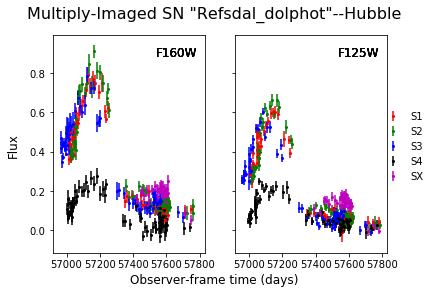

In [2]:
#Read in the data from pat
reload(io)
bands=[]
lcs=io.curveDict(telescopename='Hubble',object='Refsdal_'+photometry)
images=['s1','s2','s3','s4','sx']
for im in images:
    imTab=None
    for f in [x for x in files if im in x]:
        tab=ascii.read(f,comment='=')
        tab.remove_column('flag')
        tab.rename_column('mhjd','time')
        tab=tab[tab['time']>tab['time'][tab['flux']==np.max(tab['flux'])]-200]
        band=f[f.find('_'+photometry)-5:f.find('_'+photometry)]
        bands.append(band)
        tab['band']=band
        tab['zpsys']='ab'
        tab['zp']=25.0
        if imTab is None:
            imTab=copy(tab)
        else:
            imTab=vstack([imTab,tab])

    curve=sntd.table_factory(imTab,telescopename='Hubble',object=os.path.basename(f)[5:7].upper())
    lcs.add_curve(curve)
lcs.plot_object(showfig=True,filename='mySN_orig')
plt.close()


In [3]:
def chisquare(observed_values,expected_values,errors,df):
    z = (observed_values - expected_values) / errors 
    chi2 = np.sum(z ** 2)
    chi2dof = chi2/df

    return chi2, chi2dof

def print_td_mu(curveDict):
    for b in np.sort(curveDict.keys()):
        for d in np.sort(curveDict[b].images.keys()):
            tempTable=curveDict[b].images[d].table[curveDict[b].images[d].table['band']==b]
            dof=curveDict[b].images[d].fits.res.ndof
            chisq,red_chisq=chisquare(tempTable['flux'],
                            curveDict[b].images[d].fits.model.bandflux(b,tempTable['time'],zp=25.0,zpsys='ab'),
                            tempTable['fluxerr'],df=dof)#
            sigma = np.sqrt(2. / dof)
            nsig = (red_chisq - 1) / sigma
            print('Band %s, Image %s: Reduced Chisq=%f, Nsig=%f'%(b,d,red_chisq,nsig))#,stats.chi2.sf(red_chisq,dof)
        delays,delay_errs=curveDict[b].time_delays,curveDict[b].time_delay_errors
        mags,mag_errs=curveDict[b].magnifications,curveDict[b].magnification_errors
        print('     Time Delays: ')
        for d in np.sort(delays.keys()):
            print('          S1%s=%.2f±%.2f'%(d,delays[d],delay_errs[d]))
        print('     Magnifications: ')
        for d in np.sort(mags.keys()):
            print('          S1%s=%.2f±%.2f'%(d,mags[d],mag_errs[d]))

F160W
amplitude
Image S3:  <amplitude> = 6.721795e-01 +- 3.75e-02
Image S2:  <amplitude> = 7.894982e-01 +- 4.97e-02
Image S1:  <amplitude> = 6.910449e-01 +- 4.59e-02
Image SX:  <amplitude> = 2.204798e-01 +- 1.53e-02
Image S4:  <amplitude> = 2.696350e-01 +- 3.63e-02
s
Image S3:  <s> = 1.141884e-01 +- 3.21e-02
Image S2:  <s> = 1.239565e-01 +- 3.03e-02
Image S1:  <s> = 1.085704e-01 +- 2.90e-02
Image SX:  <s> = 1.881769e-02 +- 1.43e-02
Image S4:  <s> = 2.808442e-02 +- 1.90e-02
sigma
('Image S3:  <sigma> = 9.140279e+01 +- 9.52e+00', 0.14428635927581276)
('Image S2:  <sigma> = 8.862643e+01 +- 8.11e+00', 0.1390162685872134)
('Image S1:  <sigma> = 9.417859e+01 +- 9.57e+00', 0.1459141808274371)
('Image SX:  <sigma> = 9.526552e+01 +- 1.43e+01', 0.24803201861796395)
('Image S4:  <sigma> = 8.866267e+01 +- 1.31e+01', 0.2539861938434677)
(91.90323650146772, 11.49116918493938)
  <sigma> = 9.198e+01 +- 1.214e+01
k
('Image S3:  <k> = 4.722852e-01 +- 1.56e-01', 0.14428635927581276)
('Image S2:  <k> = 4.

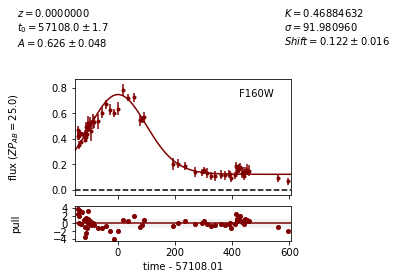

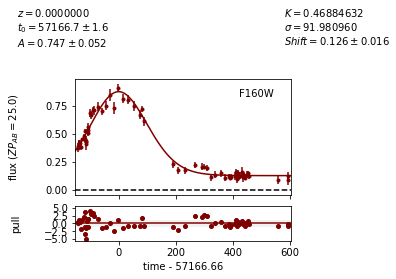

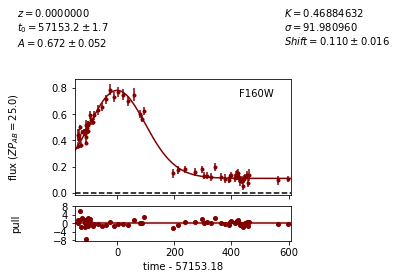

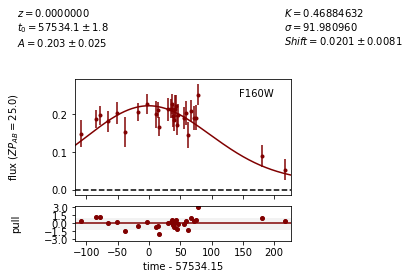

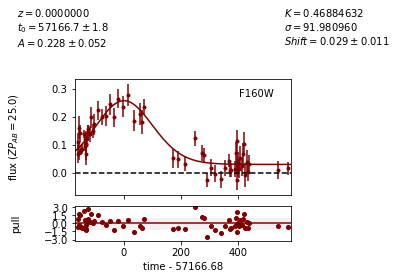

F125W
amplitude
Image S3:  <amplitude> = 5.243984e-01 +- 3.23e-02
Image S2:  <amplitude> = 6.118156e-01 +- 4.79e-02
Image S1:  <amplitude> = 5.433727e-01 +- 3.87e-02
Image SX:  <amplitude> = 1.690820e-01 +- 1.40e-02
Image S4:  <amplitude> = 2.397925e-01 +- 2.96e-02
s
Image S3:  <s> = 4.838825e-02 +- 1.83e-02
Image S2:  <s> = 6.085239e-02 +- 1.91e-02
Image S1:  <s> = 5.414530e-02 +- 1.88e-02
Image SX:  <s> = 1.592756e-02 +- 1.15e-02
Image S4:  <s> = 2.722027e-02 +- 1.62e-02
sigma
('Image S3:  <sigma> = 9.275997e+01 +- 9.20e+00', 0.150783245400293)
('Image S2:  <sigma> = 9.119290e+01 +- 9.41e+00', 0.1575330375266853)
('Image S1:  <sigma> = 9.860278e+01 +- 9.88e+00', 0.18183644962009154)
('Image SX:  <sigma> = 9.185260e+01 +- 1.49e+01', 0.21794768100599127)
('Image S4:  <sigma> = 8.711825e+01 +- 1.41e+01', 0.21628076351716105)
(92.58116241785538, 12.325836601501367)
  <sigma> = 9.238e+01 +- 1.270e+01
k
('Image S3:  <k> = 4.439135e-01 +- 1.38e-01', 0.150783245400293)
('Image S2:  <k> = 4.4

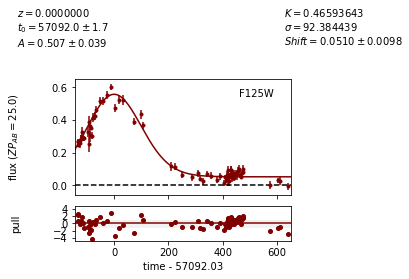

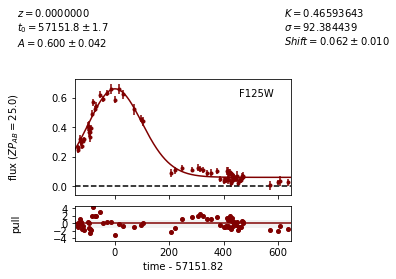

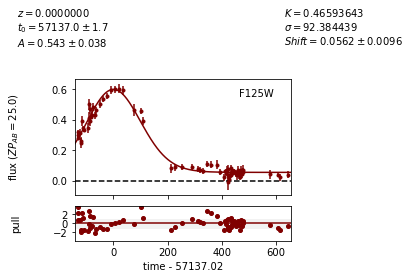

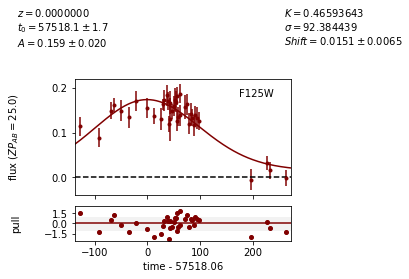

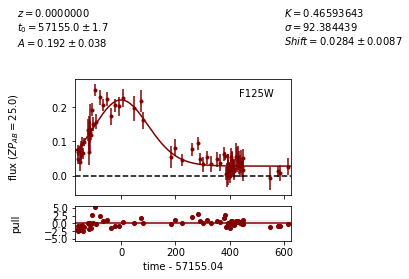

In [27]:
#Fit with new pierel model first
reload(models)
reload(fitting)

my_curves=dict([])
#guess={'F160W':{'S1':57148,'S2':57165,'S3':57114,'S4':57163},'F125W':{'S1':57142,'S2':57162,'S3':57097,'S4':57160}}
guess={'F160W':{'S1':57153,'S2':57167,'S3':57108,'S4':57167,'SX':57534},
       'F125W':{'S1':57137,'S2':57152,'S3':57092,'S4':57155,'SX':57518}}
for b in lcs.bands:
    print(b)
    bds={'t0':(-3,3),'amplitude':(.8,1.35),'k':(.2,.75),'sigma':(65,120),'s':(0,.2)}

    temp=fitting.fit_data(lcs,bands=[b],snType='II',models=['PierelSource'],params=['k','sigma','amplitude','t0','s'],flip=False,t0_guess=guess[b],
                               bounds=bds,combined_or_separate='separate')
    my_curves[b]=copy(temp)

In [28]:
import math
reload(fitting)

#print(my_curves['F160W'].images['S1'].fits.final_errs)
#print(my_curves['F160W'].images['S2'].fits.final_errs)

print_td_mu(my_curves)
    
    
    

Band F125W, Image S1: Reduced Chisq=1.729674, Nsig=4.159780
Band F125W, Image S2: Reduced Chisq=2.134112, Nsig=6.465435
Band F125W, Image S3: Reduced Chisq=2.291733, Nsig=7.364013
Band F125W, Image S4: Reduced Chisq=1.820960, Nsig=4.680192
Band F125W, Image SX: Reduced Chisq=1.220670, Nsig=0.909845
     Time Delays: 
          S1S1=0.00±0.00
          S1S2=-14.80±2.43
          S1S3=44.99±2.37
          S1S4=-18.02±2.42
          S1SX=-381.05±2.42
     Magnifications: 
          S1S1=1.00±0.00
          S1S2=1.11±0.12
          S1S3=0.93±0.09
          S1S4=0.35±0.06
          S1SX=0.29±0.03
Band F160W, Image S1: Reduced Chisq=2.921146, Nsig=10.609875
Band F160W, Image S2: Reduced Chisq=2.774617, Nsig=9.880651
Band F160W, Image S3: Reduced Chisq=2.406038, Nsig=7.701186
Band F160W, Image S4: Reduced Chisq=1.327829, Nsig=1.810494
Band F160W, Image SX: Reduced Chisq=1.084145, Nsig=0.291486
     Time Delays: 
          S1S1=0.00±0.00
          S1S2=-13.49±2.45
          S1S3=45.17±2.45
   

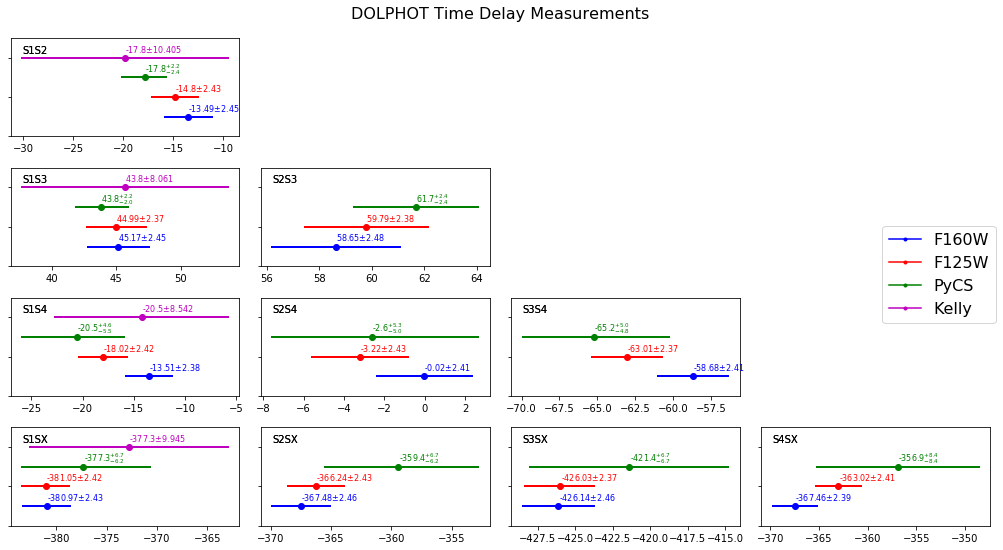

In [29]:
from sntd import plotting
from matplotlib.lines import Line2D
reload(plotting)
plt.clf()
pycs={'S1S2':-17.8,'S1S3':43.8,'S1S4':-20.5,'S2S3':61.7,'S2S4':-2.6,
      'S3S4':-65.2,'S1SX':-377.3,'S2SX':-359.4,'S3SX':-421.4,'S4SX':-356.9}
pycs_pos={'S1S2':2.2,'S1S3':2.2,'S1S4':4.6,'S2S3':2.4,'S2S4':5.3,
          'S3S4':5.0,'S1SX':6.7,'S2SX':6.7,'S3SX':6.7,'S4SX':8.4}
pycs_neg={'S1S2':2.4,'S1S3':2.0,'S1S4':5.5,'S2S3':2.4,'S2S4':5.0,
          'S3S4':4.8,'S1SX':6.2,'S2SX':6.2,'S3SX':6.7,'S4SX':8.4}
pat={'S1S2':-19.8,'S1S3':45.685,'S1S4':-14.239,'S1SX':-372.768}
pat_pos={'S1S2':10.405,'S1S3':8.061,'S1S4':8.542,'S1SX':9.945}
pat_neg={'S1S2':10.405,'S1S3':8.061,'S1S4':8.542,'S1SX':9.945}

def plot_separate_res(curveDict):
    colors=['b','r']
    ax=None
    fig=None
    offset=1
    for i in range(len(curveDict.keys())):
        if ax is None:
            ax,fig=plotting.plotTimeDelays(curveDict[curveDict.keys()[i]],band=curveDict.keys()[i],
                                           offset=offset,color=colors[i],showfig=False,savefig=False)
        else:
            ax,fig=plotting.plotTimeDelays(curveDict[curveDict.keys()[i]],band=curveDict.keys()[i],
                                    color=colors[i],offset=offset,fig=fig,ax=ax,showfig=False,savefig=False)
        offset+=1

    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            delay='S'+str(j+1)+'S'+str(i+2) if i+2<5 else 'S'+str(j+1)+'SX'
            if j<=i:
                ax[i][j].errorbar(pycs[delay],offset,xerr=[[pycs_neg[delay]],[pycs_pos[delay]]],
                                 fmt='.',color='g',linewidth=2,markersize=12)
                #ax[i][j].set_ylim((0,offset+1))
                ax[i][j].annotate(str(pycs[delay])+'$^{+'+str(pycs_pos[delay])+'}_{-'+str(pycs_neg[delay])+'}$',
                                 size=8,xy=(.9999*pycs[delay],offset+.3),xycoords='data',color='g')
            if j==0:
                ax[i][j].errorbar(pat[delay],offset+1,xerr=[[pat_neg[delay]],[pat_pos[delay]]],
                                 fmt='.',color='m',linewidth=2,markersize=12)
                
                ax[i][j].annotate(str(pycs[delay])+'$\pm$'+str(pat_pos[delay]),
                                 size=8,xy=(.9999*pat[delay],offset+1.3),xycoords='data',color='m')
            ax[i][j].set_ylim((0,offset+2))
    fig.suptitle(photometry.upper()+' Time Delay Measurements',size=16)
    custom_lines=[Line2D([0],[0],marker='.',color=colors[i]) for i in range(len(colors))]
    custom_lines.append(Line2D([0],[0],marker='.',color='g'))
    custom_lines.append(Line2D([0],[0],marker='.',color='m'))
    leg=plt.figlegend(custom_lines,np.append(curveDict.keys(),['PyCS','Kelly']),loc='center right',fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    #fig.figsize=(15,15)
plot_separate_res(my_curves)
plt.show()
plt.close()
        

In [32]:
#Fit with new pierel model to combined lc
reload(fitting)
from sntd import io
reload(io)
curves=dict([])
guess={'F160W':57153,'F125W':57137}

for b in lcs.bands:
    compFunc,errors=fitting.create_composite_model(my_curves[b],b,'S1',weight='logz')
    #print(type(my_curves[b]))
    #temp=io.curveDict(my_curves[b])#io._sntd_deepcopy(deepcopy(my_curves[b]))
    temp=io._sntd_deepcopy(deepcopy(lcs))
    temp.combine_curves(tds=my_curves[b].time_delays,mus=my_curves[b].magnifications)
    temp.plot_object(combined=True,filename=b+'_mySN',bands=set([b]))
    temp.combined.table.sort('time')
    #fig=plt.figure()
    #ax=fig.gca()
    #ax.scatter(temp.combined.table['time'],temp.combined.table['flux'])
    #ax.plot(temp.combined.table['time'],compFunc(temp.combined.table['time']))
    #plt.show()
    #sys.exit()
    td_bound=np.max(my_curves[b].time_delay_errors.values())
    mu_bound=np.max(my_curves[b].magnification_errors.values())
    #temp.images['S1'].fits=fitting.newDict()
    #temp.images['S1'].fits.model=copy(my_curves[b].images['S1'].fits.model)
    bds={'t0':(-5,5),'amplitude':(.75,1.35),'k':(.2,.75),'sigma':(75,120),'s':(0,.2)}
    #(copy(my_curves[b].images['S1'].fits.model),copy(my_curves[b].images['S1'].fits.res))
    temp=fitting.fit_data(temp,bands=[b],refModel=compFunc,
                               snType='II',models=['PierelSource'],params=['k','sigma','amplitude','t0','s'],
                               t0_guess=guess[b],combinedError=errors,bounds=bds,
                               combinedGrids={'td':(-5,5),'mu':(-.1,.1)},
                               combined_or_separate='combined')
    curves[b]=copy(temp)

In [33]:
for b in np.sort(curves.keys()):
    tempTable=curves[b].combined.table[curves[b].combined.table['band']==b]
    tempTable.sort('time')
    dof=len(curves[b].combined.table)-1#fits.res.ndof
    chisq,red_chisq=chisquare(tempTable['flux'],
                    curves[b].combined.fits.model(tempTable['time']),
                    tempTable['fluxerr'],df=dof)#
    sigma = np.sqrt(2. / dof)
    nsig = (red_chisq - 1) / sigma
    print('Band %s, Image %s: Reduced Chisq=%f, Nsig=%f'%(b,d,red_chisq,nsig))#,stats.chi2.sf(red_chisq,dof)
    delays,delay_errs=curves[b].combined.time_delays,curves[b].combined.time_delay_errors
    mags,mag_errs=curves[b].combined.magnifications,curves[b].combined.magnification_errors
    print('     Time Delays: ')
    for d in np.sort(delay_errs.keys()):
        print('          S1%s=%.2f±%.2f'%(d,delays[d],delay_errs[d]))
    print('     Magnifications: ')
    for d in np.sort(mag_errs.keys()):
        print('          S1%s=%.2f±%.2f'%(d,mags[d],mag_errs[d]))
    

NameError: name 'd' is not defined

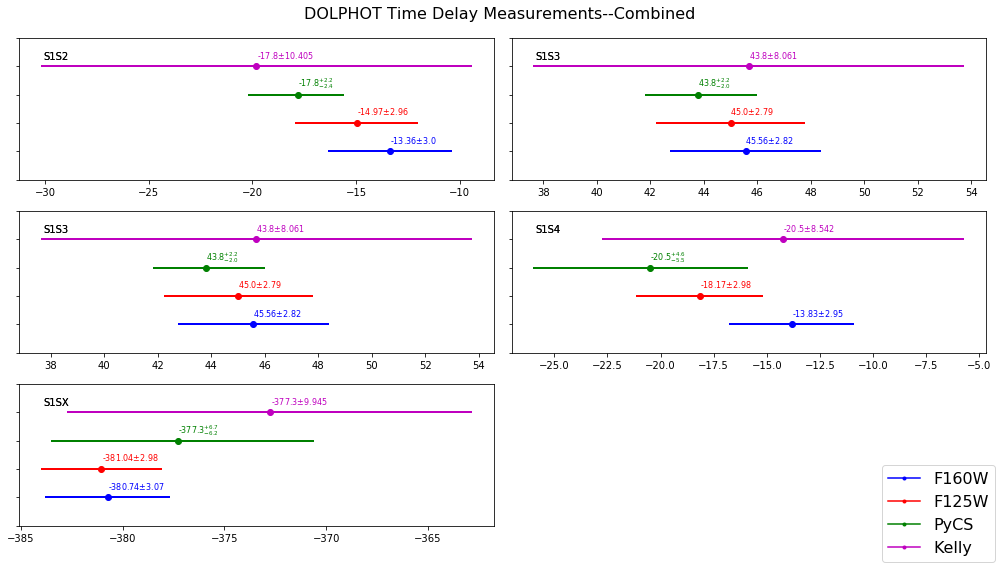

In [86]:

reload(io)
def plot_combined_fit(curveDict,fitter):
    for b in curves.keys():
        temp=io._sntd_deepcopy(deepcopy(lcs))
        temp.combine_curves(tds=curveDict[b].combined.time_delays,mus=curveDict[b].combined.magnifications)
        temp.combined.fits=fitting.newDict()
        temp.combined.fits.model=copy(curveDict[b].combined.fits.model)
        temp.plot_object(bands=set([b]),showfit=True,combined=True,filename=fitter+'_mySN_'+b+'_fit')
    plt.close()
    fig,ax=plt.subplots(nrows=3,ncols=2,sharex=False,sharey=True,figsize=(14,8))
    offset=1
    colors={'F160W':'b','F125W':'r'}
    for b in curves.keys():
        for i in range(3):
            for j in range(2):
                delay='S1S'+str(i+j+2) if i<2 else 'S1SX'
                ax[i][j].errorbar(curveDict[b].combined.time_delays[delay[-2:]],offset,
                                          xerr=curveDict[b].combined.time_delay_errors[delay[-2:]],
                                          fmt='.',color=colors[b],linewidth=2,markersize=12)
                ax[i][j].annotate(delay,size=10,xy=(0.05,.85),xycoords='axes fraction')
                ax[i][j].annotate(str(np.round(curveDict[b].combined.time_delays[delay[-2:]],2))+'$\pm$'+str(np.round(curveDict[b].combined.time_delay_errors[delay[-2:]],2)),
                                  size=8,xy=(.9999*(curveDict[b].combined.time_delays[delay[-2:]]),offset+.3),xycoords='data',color=colors[b])
                #ax[i][j].set_xlim((.8*(lcs.time_delays['S'+str(i+2)]-lcs.time_delays['S'+str(j+1)]),1.2*(lcs.time_delays['S'+str(i+2)]-lcs.time_delays['S'+str(j+1)])))

        offset+=1
    for i in range(3):
        for j in range(2):
            delay='S1S'+str(i+j+2) if i<2 else 'S1SX'
            ax[i][j].set_ylim((0,offset+1))
            ax[i][j].tick_params(axis='y',labelleft='off')
            ax[i][j].errorbar(pycs[delay],offset,xerr=[[pycs_neg[delay]],[pycs_pos[delay]]],
                         fmt='.',color='g',linewidth=2,markersize=12)
            #ax[i][j].set_ylim((0,offset+1))
            ax[i][j].annotate(str(pycs[delay])+'$^{+'+str(pycs_pos[delay])+'}_{-'+str(pycs_neg[delay])+'}$',
                             size=8,xy=(.9999*pycs[delay],offset+.3),xycoords='data',color='g')

            ax[i][j].errorbar(pat[delay],offset+1,xerr=[[pat_neg[delay]],[pat_pos[delay]]],
                             fmt='.',color='m',linewidth=2,markersize=12)

            ax[i][j].annotate(str(pycs[delay])+'$\pm$'+str(pat_pos[delay]),
                             size=8,xy=(.9999*pat[delay],offset+1.3),xycoords='data',color='m')
            ax[i][j].set_ylim((0,offset+2))
        fig.suptitle(photometry.upper()+' Time Delay Measurements',size=16)

    fig.delaxes(ax[2][1])
    fig.suptitle(photometry.upper()+' Time Delay Measurements--Combined',size=16)
    custom_lines=[Line2D([0],[0],marker='.',color=colors[b]) for b in curves.keys()]
    custom_lines.append(Line2D([0],[0],marker='.',color='g'))
    custom_lines.append(Line2D([0],[0],marker='.',color='m'))
    leg=plt.figlegend(custom_lines,np.append(curveDict.keys(),['PyCS','Kelly']),loc='lower right',fontsize=16)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plot_combined_fit(curves,'pierel')
plt.show()
plt.close()
    

F160W
rise
('Image S3:  <rise> = 4.609640e+01 +- 4.16e+00', 0.1544379959864614)
('Image S2:  <rise> = 4.353557e+01 +- 3.67e+00', 0.14162728016998205)
('Image S1:  <rise> = 4.667189e+01 +- 3.79e+00', 0.151836495471092)
('Image SX:  <rise> = 4.440105e+01 +- 6.78e+00', 0.2185036578376982)
('Image S4:  <rise> = 3.954795e+01 +- 5.32e+00', 0.24244382359537817)
(44.1762444990339, 5.512596857723907)
  <rise> = 4.377e+01 +- 5.762e+00
B
Image S3:  <B> = 1.071407e-01 +- 3.11e-02
Image S2:  <B> = 1.086929e-01 +- 2.97e-02
Image S1:  <B> = 9.962172e-02 +- 2.78e-02
Image SX:  <B> = 2.334554e-02 +- 1.61e-02
Image S4:  <B> = 2.734008e-02 +- 1.75e-02
amplitude
Image S3:  <amplitude> = 6.613524e-01 +- 5.14e-02
Image S2:  <amplitude> = 7.871630e-01 +- 6.52e-02
Image S1:  <amplitude> = 6.907672e-01 +- 6.32e-02
Image SX:  <amplitude> = 2.128037e-01 +- 1.74e-02
Image S4:  <amplitude> = 2.625077e-01 +- 3.55e-02
t0
Image S3:  <t0> = 5.712098e+04 +- 1.78e+00
Image S2:  <t0> = 5.717292e+04 +- 1.81e+00
Image S1: 

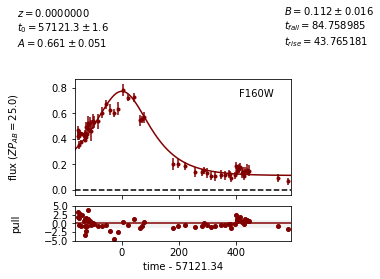

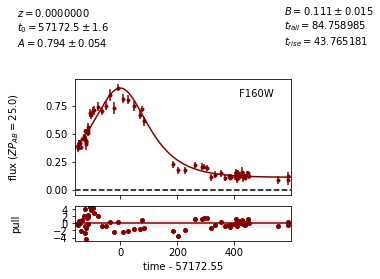

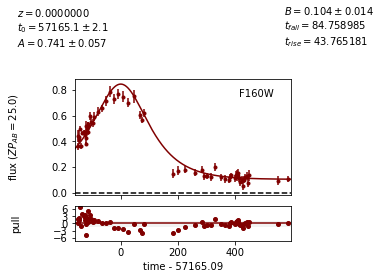

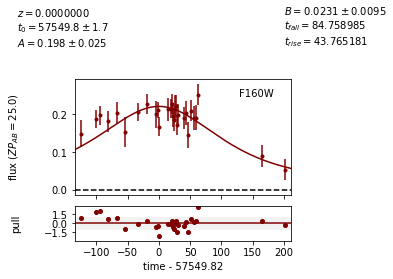

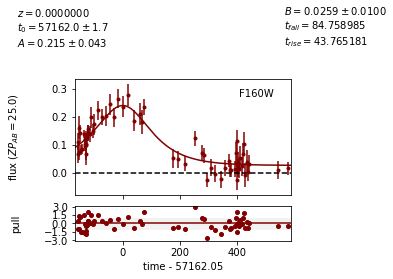

F125W
rise
('Image S3:  <rise> = 4.350482e+01 +- 3.88e+00', 0.1580303734018343)
('Image S2:  <rise> = 4.104708e+01 +- 3.80e+00', 0.16032216382393003)
('Image S1:  <rise> = 4.623098e+01 +- 4.16e+00', 0.18712575007605017)
('Image SX:  <rise> = 4.387922e+01 +- 6.70e+00', 0.21525980302901343)
('Image S4:  <rise> = 3.951098e+01 +- 5.49e+00', 0.21776137270639015)
(42.96216805842406, 5.460009518146561)
  <rise> = 4.292e+01 +- 5.608e+00
B
Image S3:  <B> = 4.405041e-02 +- 1.88e-02
Image S2:  <B> = 5.170341e-02 +- 2.06e-02
Image S1:  <B> = 4.633373e-02 +- 1.79e-02
Image SX:  <B> = 1.625310e-02 +- 1.16e-02
Image S4:  <B> = 2.727452e-02 +- 1.58e-02
amplitude
Image S3:  <amplitude> = 5.217923e-01 +- 4.31e-02
Image S2:  <amplitude> = 6.245092e-01 +- 5.62e-02
Image S1:  <amplitude> = 5.537242e-01 +- 5.03e-02
Image SX:  <amplitude> = 1.605309e-01 +- 1.44e-02
Image S4:  <amplitude> = 2.328807e-01 +- 3.03e-02
t0
Image S3:  <t0> = 5.709610e+04 +- 1.74e+00
Image S2:  <t0> = 5.715196e+04 +- 1.65e+00
Image 

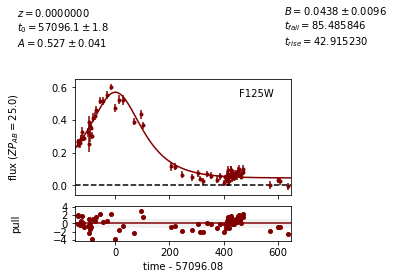

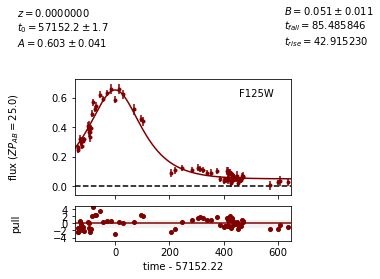

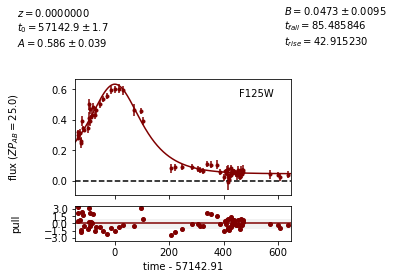

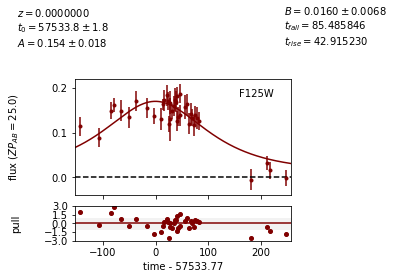

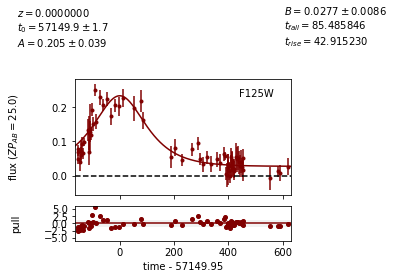

In [77]:
#fit to bazin 2009 model separately
reload(fitting)
reload(models)
baz_curves=dict([])

#guess={'F160W':{'S1':57153,'S2':57172,'S3':57112,'S4':57162,'SX':57537},
#       'F125W':{'S1':57151,'S2':57147,'S3':57093,'S4':57150,'SX':57535}}

#guess={'F160W':{'S1':57167,'S2':57183,'S3':57121,'S4':57185,'SX':57542},
#       'F125W':{'S1':57157,'S2':57184,'S3':57096,'S4':57166,'SX':57534}}
guess={'F160W':{'S1':57165,'S2':57173,'S3':57121,'S4':57162,'SX':57550},
       'F125W':{'S1':57143,'S2':57152,'S3':57096,'S4':57150,'SX':57534}}
for b in lcs.bands:
    print(b)
    if b=='F160W':
        bds={'t0':(-3,3),'amplitude':(.75,1.25),'fall':(70,100),'rise':(30,55),'B':(0,.25)}
    else:
        bds={'t0':(-3,3),'amplitude':(.75,1.25),'fall':(70,100),'rise':(30,55),'B':(0,.25)}
    temp=fitting.fit_data(lcs,bands=[b],snType='II',models=['BazinSource'],params=['amplitude','B','fall','rise','t0'],
                            flip=False,t0_guess=guess[b],bounds=bds,combined_or_separate='separate')
    baz_curves[b]=copy(temp)

In [78]:
print_td_mu(baz_curves)


Band F125W, Image S1: Reduced Chisq=1.786563, Nsig=4.484097
Band F125W, Image S2: Reduced Chisq=2.404438, Nsig=8.006528
Band F125W, Image S3: Reduced Chisq=2.301846, Nsig=7.421664
Band F125W, Image S4: Reduced Chisq=1.906280, Nsig=5.166592
Band F125W, Image SX: Reduced Chisq=1.585883, Nsig=2.415658
     Time Delays: 
          S1S1=0.00±0.00
          S1S2=-9.30±2.37
          S1S3=46.84±2.44
          S1S4=-7.03±2.37
          S1SX=-390.86±2.47
     Magnifications: 
          S1S1=1.00±0.00
          S1S2=1.03±0.13
          S1S3=0.90±0.11
          S1S4=0.35±0.06
          S1SX=0.26±0.03
Band F160W, Image S1: Reduced Chisq=4.527122, Nsig=19.479168
Band F160W, Image S2: Reduced Chisq=3.226725, Nsig=12.397882
Band F160W, Image S3: Reduced Chisq=2.363922, Nsig=7.470511
Band F160W, Image S4: Reduced Chisq=1.376856, Nsig=2.081255
Band F160W, Image SX: Reduced Chisq=1.248382, Nsig=0.860422
     Time Delays: 
          S1S1=0.00±0.00
          S1S2=-7.46±2.47
          S1S3=43.74±2.45
     

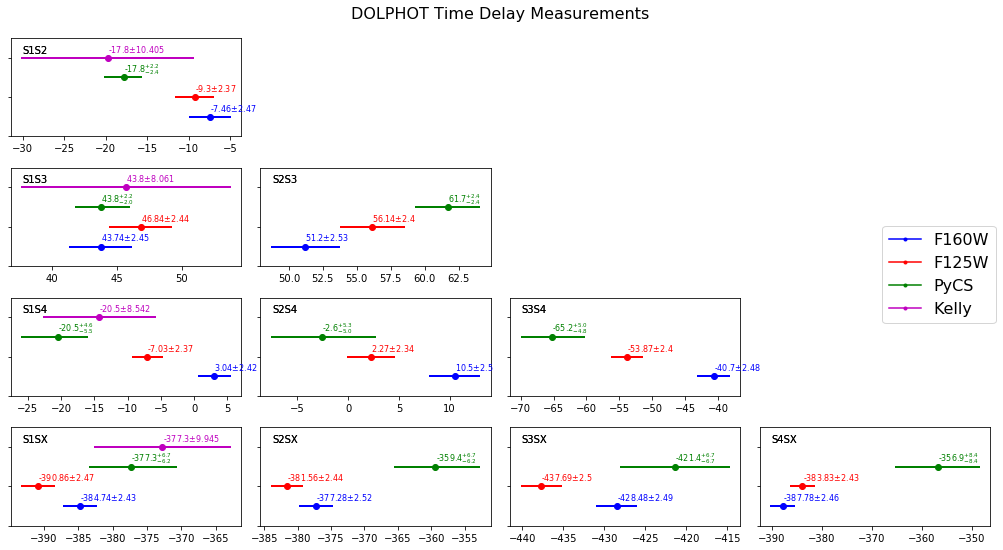

In [79]:
plot_separate_res(baz_curves)
plt.show()
plt.close()

In [84]:
#Fit with bazin model to combined lc
reload(fitting)
reload(models)
from sntd import io
reload(io)
baz_comb=dict([])
guess={'F160W':57165,'F125W':57143}

for b in lcs.bands:
    compFunc2,errors=fitting.create_composite_model(baz_curves[b],b,'S1',weight='logz')
    #print(type(my_curves[b]))
    #temp=io.curveDict(my_curves[b])#io._sntd_deepcopy(deepcopy(my_curves[b]))
    temp=io._sntd_deepcopy(deepcopy(lcs))
    temp.combine_curves(tds=baz_curves[b].time_delays,mus=baz_curves[b].magnifications)
    temp.plot_object(combined=True,filename='bazin_'+b+'_mySN',bands=set([b]))
    temp.combined.table.sort('time')
    bds={'t0':(-5,5),'amplitude':(.75,1.25),'fall':(70,100),'rise':(30,55),'B':(0,.25)}
    temp=fitting.fit_data(temp,bands=[b],refModel=compFunc2,
                               snType='II',models=['BazinSource'],params=['amplitude','B','fall','rise','t0'],
                               t0_guess=guess[b],combinedError=errors,bounds=bds,
                               combinedGrids={'td':(-5,5),'mu':(-.2,.2)},
                               combined_or_separate='combined')
    baz_comb[b]=copy(temp)
    

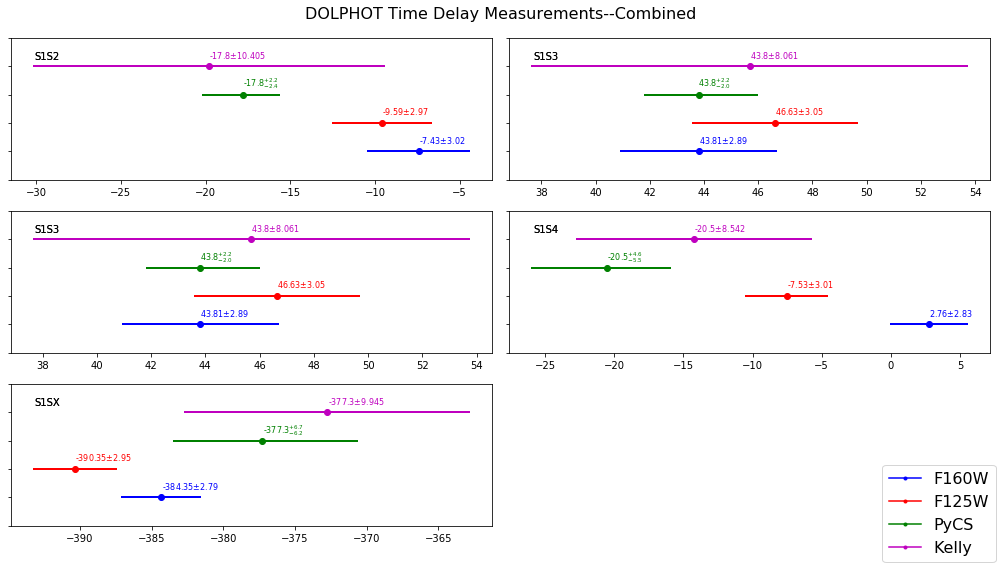

In [87]:
plot_combined_fit(baz_comb,'bazin')
plt.show()
plt.close()




S1


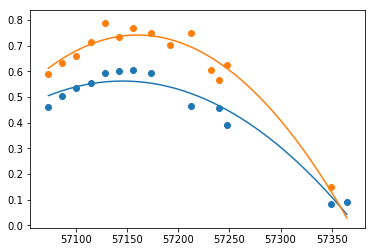

S2


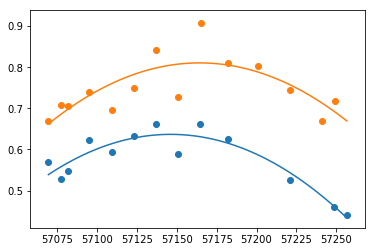

S3


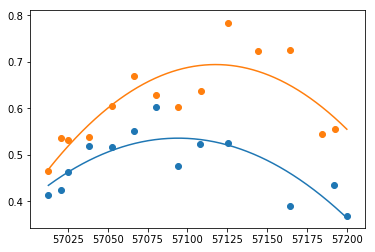

S4


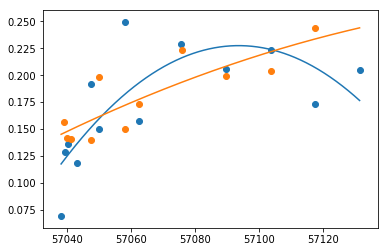

SX


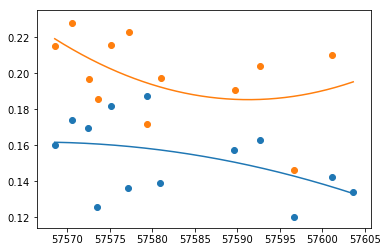

S2
None
None


In [89]:
#fitting color curves
plt.close()
from sntd import util
reload(util)
temp=io._sntd_deepcopy(deepcopy(lcs))
delays=util.colorFit(temp)
print(delays)